<a href="https://colab.research.google.com/github/piyuchore1234/Dating-profile-matcher/blob/main/Cosine_images_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [13]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt


%matplotlib inline

global embed
#embed = hub.KerasLayer(os.getcwd())
embed = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False)

In [14]:
for x in os.listdir("."):
    print(x)

.config
drive
sample_data


In [15]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [16]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image 
    """
    with open(FileName, "rb") as f:
        data = f.read()
        
    res = base64.b64encode(data)
    
    base64data = res.decode("UTF-8")
    
    imgdata = base64.b64decode(base64data)
    
    image = Image.open(io.BytesIO(imgdata))
    
    return np.array(image)

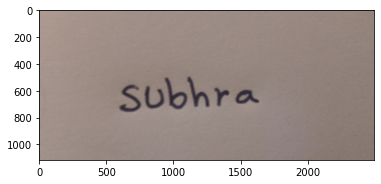

In [29]:
plt.imshow(convertBase64('/content/drive/MyDrive/Signature Comparison/shubhra 1.jpg'))# Enter path of signature

In [30]:
helper = TensorVector("/content/drive/MyDrive/Signature Comparison/shubhra 1.jpg")
vector = helper.process()

In [31]:
len(vector)

1280

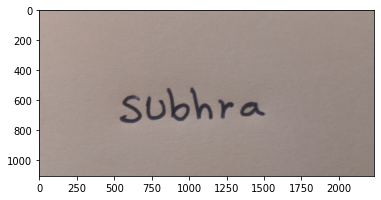

In [35]:
plt.imshow(convertBase64("/content/drive/MyDrive/Signature Comparison/shubhra 2.jpg"))# Enter path of duplicate/second image of same signature

In [36]:
helper = TensorVector("/content/drive/MyDrive/Signature Comparison/priyanka.jpg")
vector2 = helper.process()

In [37]:
len(vector2)

1280

In [38]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [39]:
cosineSim(vector, vector2)

0.7970792301392985